#Proyek Analisa Data :[]
- Nama : [guruh sukmo]
- Email : [sukmoguruh7@gmail.com]
- ID Dicoding : []

1. pada jam-jam berapa terjadi peningkatan jumlah penyewa sepeda?

2. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda pada setiap jamnya?

3. Bagaiamana pengaruh musim terhadap jumlah penyewa sepeda

4. Apakah terdapat perbedaan jumlah penyewa sepeda terdaftar dan tidak terdaftar pada hari tertentu?

#import semua package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("pandas version : ", pd.__version__)
print("numpy version : ", np.__version__)
print("seaborn version : ", sns.__version__)


pandas version :  2.2.3
numpy version :  2.2.3
seaborn version :  0.13.2


#Data Wrangling

#Gathering Data

In [3]:
day =pd.read_csv("https://raw.githubusercontent.com/Zuckmo/AnalisaDataSepeda/refs/heads/main/day.csv")
hour =pd.read_csv("https://raw.githubusercontent.com/Zuckmo/AnalisaDataSepeda/refs/heads/main/hour.csv")

insight:

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:


print("Jumlah baris data 'day':", len(day))
print("Jumlah baris data 'hour':", len(hour))


Jumlah baris data 'day': 731
Jumlah baris data 'hour': 17379


In [6]:


import pandas as pd
combined_data = pd.concat([day, hour], ignore_index=True)
print("Jumlah baris data gabungan :", len(combined_data))
combined_data.head()


Jumlah baris data gabungan : 18110


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


In [7]:
combined_data.isna().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

In [8]:
combined_data.duplicated().sum()

np.int64(0)

In [9]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
#tampilkan unique value dari kolom "hr"

print(hour['hr'].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [11]:
"""
instant: indeks rekaman
dteday: tanggal
season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
yr: tahun (0: 2011, 1: 2012)
mnth: bulan (1 hingga 12)
hr: jam (0 hingga 23)
holiday: apakah hari tersebut adalah hari libur atau bukan (diambil dari jadwal libur DCHR)
weekday: hari dalam seminggu
workingday: jika hari tersebut bukan akhir pekan atau hari libur, maka bernilai 1, jika tidak maka 0
weathersit (kondisi cuaca):
    1: Cerah, sedikit berawan, berawan sebagian
    2: Kabut + berawan, kabut + awan pecah, kabut + sedikit awan, kabut
    3: Salju ringan, hujan ringan + petir + awan tersebar, hujan ringan + awan tersebar
    4: Hujan lebat + es + petir + kabut, salju + kabut
temp: suhu yang telah dinormalisasi dalam Celsius (dibagi dengan 41 sebagai nilai maksimum)
atemp: suhu yang dirasakan yang telah dinormalisasi dalam Celsius (dibagi dengan 50 sebagai nilai maksimum)
hum: kelembaban yang telah dinormalisasi (dibagi dengan 100 sebagai nilai maksimum)
windspeed: kecepatan angin yang telah dinormalisasi (dibagi dengan 67 sebagai nilai maksimum)
casual: jumlah pengguna sepeda tidak terdaftar
registered: jumlah pengguna sepeda yang terdaftar
cnt: jumlah total penyewaan sepeda termasuk pengguna tidak terdaftar dan terdaftar
"""

'\ninstant: indeks rekaman\ndteday: tanggal\nseason: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)\nyr: tahun (0: 2011, 1: 2012)\nmnth: bulan (1 hingga 12)\nhr: jam (0 hingga 23)\nholiday: apakah hari tersebut adalah hari libur atau bukan (diambil dari jadwal libur DCHR)\nweekday: hari dalam seminggu\nworkingday: jika hari tersebut bukan akhir pekan atau hari libur, maka bernilai 1, jika tidak maka 0\nweathersit (kondisi cuaca):\n    1: Cerah, sedikit berawan, berawan sebagian\n    2: Kabut + berawan, kabut + awan pecah, kabut + sedikit awan, kabut\n    3: Salju ringan, hujan ringan + petir + awan tersebar, hujan ringan + awan tersebar\n    4: Hujan lebat + es + petir + kabut, salju + kabut\ntemp: suhu yang telah dinormalisasi dalam Celsius (dibagi dengan 41 sebagai nilai maksimum)\natemp: suhu yang dirasakan yang telah dinormalisasi dalam Celsius (dibagi dengan 50 sebagai nilai maksimum)\nhum: kelembaban yang telah dinormalisasi (dibagi dengan 100 sebagai nila

#Assessing Data

In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("jumlah data duplikat data day : ", day.duplicated().sum())

jumlah data duplikat data day :  0


In [17]:
print("jumlah data duplikat data hour : ", day.duplicated().sum())

jumlah data duplikat data hour :  0


#Cleaning Data


insight:
- tidak perlu untuk di Cleaning karena data sudah bagus, namun perlu di namai ulang biar gampang dibaca.


In [18]:
day.rename(columns={"yr":"year", "mnth":"month", "weathersit":"weather_situation", "atemp":"average_temp", "hum":"humidity", "cnt":"total"}, inplace=True)

In [19]:
hour.rename(columns={"yr":"year", "mnth":"month", "weathersit":"weather_situation", "hr":"hour", "atemp":"average_temp", "hum":"humidity", "cnt":"total"}, inplace=True)

In [20]:
#Mengubah tipe data dteday menjadi datetime
day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])


In [21]:
def change_season(season):
    if season == 1:
        return "spring"
    elif season == 2:
        return "summer"
    elif season == 3:
        return "fall"
    elif season == 4:
        return "winter"

day["season"] = day["season"].apply(change_season)
hour["season"] = hour["season"].apply(change_season)

In [22]:
def change_year(year):
  if year==0:
    return 2011
  elif year ==1:
      return 2012

day["year"] = day["year"].apply(change_year)
hour["year"] = hour["year"].apply(change_year)

In [23]:
def change_month(month):
  if month==1:
    return "January"
  elif month ==2:
      return "February"
  elif month ==3:
      return "March"
  elif month ==4:
      return "April"
  elif month ==5:
      return "May"
  elif month ==6:
      return "June"
  elif month ==7:
      return "July"
  elif month ==8:
      return "August"
  elif month ==9:
      return "September"
  elif month ==10:
      return "October"
  elif month ==11:
      return "November"
  elif month ==12:
      return "December"

day["month"] = day["month"].apply(change_month)
hour["month"] = hour["month"].apply(change_month)

In [24]:
# prompt: value unik dari kolom holiday dan weekday

print(f"Unique values for 'holiday' column in 'day' dataset:\n{day['holiday'].unique()}")
print(f"\nUnique values for 'weekday' column in 'day' dataset:\n{day['weekday'].unique()}")
print(f"\nUnique values for 'holiday' column in 'hour' dataset:\n{hour['holiday'].unique()}")
print(f"\nUnique values for 'weekday' column in 'hour' dataset:\n{hour['weekday'].unique()}")


Unique values for 'holiday' column in 'day' dataset:
[0 1]

Unique values for 'weekday' column in 'day' dataset:
[6 0 1 2 3 4 5]

Unique values for 'holiday' column in 'hour' dataset:
[0 1]

Unique values for 'weekday' column in 'hour' dataset:
[6 0 1 2 3 4 5]


In [25]:
def change_weekday(weekday):
  if weekday==0:
    return "Sunday"
  elif weekday ==1:
      return "Monday"
  elif weekday ==2:
      return "Tuesday"
  elif weekday ==3:
      return "Wednesday"
  elif weekday ==4:
      return "Thursday"
  elif weekday ==5:
      return "Friday"
  elif weekday ==6:
      return "Saturday"

day["weekday"] = day["weekday"].apply(change_weekday)
hour["weekday"] = hour["weekday"].apply(change_weekday)

In [26]:
day.drop("holiday", axis=1, inplace=True)
hour.drop("holiday", axis=1, inplace=True)

In [27]:
hour["weather_situation"].unique()

array([1, 2, 3, 4])

In [28]:
def change_weather_situation(weather_situation):
  if weather_situation==1:
    return "Clear"
  elif weather_situation ==2:
      return "Mist"
  elif weather_situation ==3:
      return "Light Snow"
  elif weather_situation ==4:
      return "Heavy Rain"

day["weather_situation"] = day["weather_situation"].apply(change_weather_situation)
hour["weather_situation"] = hour["weather_situation"].apply(change_weather_situation)

In [29]:
hour["workingday"].unique()

array([0, 1])

In [30]:
def workingday(workingday):
  if workingday==1:
    return "Workingday"
  elif workingday ==0:
      return "Holiday"

day["workingday"] = day["workingday"].apply(workingday)
hour["workingday"] = hour["workingday"].apply(workingday)

In [31]:
hour["instant"].unique()

array([    1,     2,     3, ..., 17377, 17378, 17379], shape=(17379,))

In [32]:
hour.drop("instant", axis=1, inplace=True)
day.drop("instant", axis=1, inplace=True)

In [33]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             17379 non-null  datetime64[ns]
 1   season             17379 non-null  object        
 2   year               17379 non-null  int64         
 3   month              17379 non-null  object        
 4   hour               17379 non-null  int64         
 5   weekday            17379 non-null  object        
 6   workingday         17379 non-null  object        
 7   weather_situation  17379 non-null  object        
 8   temp               17379 non-null  float64       
 9   average_temp       17379 non-null  float64       
 10  humidity           17379 non-null  float64       
 11  windspeed          17379 non-null  float64       
 12  casual             17379 non-null  int64         
 13  registered         17379 non-null  int64         
 14  total 

In [34]:
hour.head()

,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,average_temp,humidity,windspeed,casual,registered,total
0,2011-01-01,spring,2011,January,0,Saturday,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,January,1,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,January,2,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,January,3,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,January,4,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


#Exploratory Data Analysis (EDA)

#Explore

In [35]:
day.describe(include='all')

,dteday,season,year,month,weekday,workingday,weather_situation,temp,average_temp,humidity,windspeed,casual,registered,total
count,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,January,Saturday,Workingday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [36]:
hour.describe(include='all')

,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,average_temp,humidity,windspeed,casual,registered,total
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,July,NaN,Saturday,Workingday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'average_temp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'total'}>]], dtype=object)

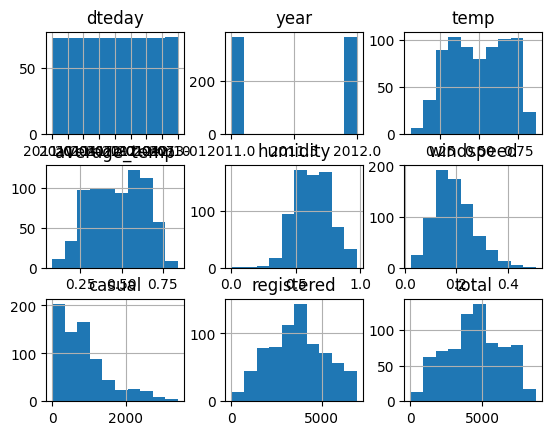

In [37]:
day.hist()

array([[<Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'average_temp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'total'}>, <Axes: >, <Axes: >]],
      dtype=object)

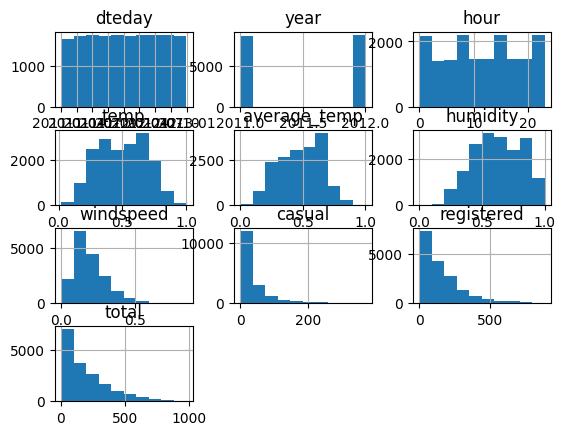

In [38]:
hour.hist()

#Explore data "day"

In [39]:
#jumlah rental berdasarkan musim
day.groupby("season").agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

,casual,registered,total
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
spring,60622,410726,471348


In [40]:
#jumlah rental berdasarkan bulan da tahun
day.groupby(["year","month"]).agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

casual  registered   total
year month                                
2012 September   43778      174795  218573
     August      43197      171306  214503
     July        41705      161902  203607
     June        43294      159536  202830
     October     34538      164303  198841
     May         44235      151630  195865
     April       38456      135768  174224
     March       31618      133257  164875
     November    21009      131655  152664
2011 June        30612      112900  143512
     July        36452      104889  141341
     August      28842      107849  136691
     May         31050      104771  135821
     September   26545      100873  127418
2012 December    13245      110468  123713
2011 October     25222       98289  123511
2012 February     8721       94416  103137
2011 November    15594       86573  102167
2012 January      8969       87775   96744
2011 April       22346       72524   94870
     December     8448       78875   87323
     March       12826       51219   64045
     February     6242       41973   48215
     January      3073       35116   38189

In [41]:
#jumlah rental sepeda berdasarkan hari
day.groupby("weekday").agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

,casual,registered,total
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [42]:
#jumlah rental sepda berdasarkan kondisi cuaca
day.groupby("weather_situation").agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

,casual,registered,total
weather_situation,,,
Clear,446346,1811606,2257952
Mist,169776,827082,996858
Light Snow,3895,33974,37869


In [43]:
day.head()

,dteday,season,year,month,weekday,workingday,weather_situation,temp,average_temp,humidity,windspeed,casual,registered,total
0,2011-01-01,spring,2011,January,Saturday,Holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,January,Sunday,Holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,January,Monday,Workingday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,January,Tuesday,Workingday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,January,Wednesday,Workingday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#explore data "hour"

In [44]:
#jumlah rental sepeda berdasarkan cuaca
hour.groupby("season").agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

,casual,registered,total
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
spring,60622,410726,471348


In [45]:
#jumlahrental sepeda berdasarkan tahun dan bulan
hour.groupby(["year","month"]).agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

casual  registered   total
year month                                
2012 September   43778      174795  218573
     August      43197      171306  214503
     July        41705      161902  203607
     June        43294      159536  202830
     October     34538      164303  198841
     May         44235      151630  195865
     April       38456      135768  174224
     March       31618      133257  164875
     November    21009      131655  152664
2011 June        30612      112900  143512
     July        36452      104889  141341
     August      28842      107849  136691
     May         31050      104771  135821
     September   26545      100873  127418
2012 December    13245      110468  123713
2011 October     25222       98289  123511
2012 February     8721       94416  103137
2011 November    15594       86573  102167
2012 January      8969       87775   96744
2011 April       22346       72524   94870
     December     8448       78875   87323
     March       12826       51219   64045
     February     6242       41973   48215
     January      3073       35116   38189

In [46]:
#jumlah rental sepeda berdasarkan jam
hour.groupby("hour").agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

,casual,registered,total
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


In [47]:
#jumlah rental sepeda berdasarkan kondisicuaca
hour.groupby("weather_situation").agg({"casual":"sum","registered":"sum","total":"sum"}).sort_values(by="total", ascending=False)

,casual,registered,total
weather_situation,,,
Clear,462745,1875428,2338173
Mist,134481,661471,795952
Light Snow,22783,135548,158331
Heavy Rain,8,215,223


In [48]:
hour.head()

,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,average_temp,humidity,windspeed,casual,registered,total
0,2011-01-01,spring,2011,January,0,Saturday,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,January,1,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,January,2,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,January,3,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,January,4,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [49]:


# Convert to CSV
day.to_csv('day_cleaned.csv', index=False)
hour.to_csv('hour_cleaned.csv', index=False)

#Vizualization & Explanatory Analysis

#pertanyaan 1:
-  pada jam-jam berapa terjadi peningkatan jumlah penyewa sepeda?


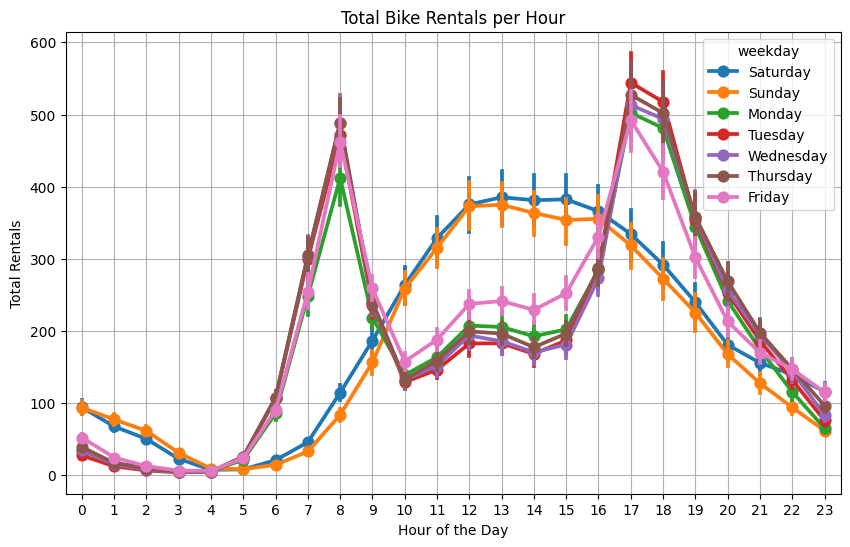

In [50]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.pointplot(x="hour", y="total", hue="weekday", data=hour)
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

berdasarkan data diatas rental sepeda palng banyak dilakukan di hari jumat pada jam 17.00.

#Pertanyaan 2:
-Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda pada setiap jamnya?

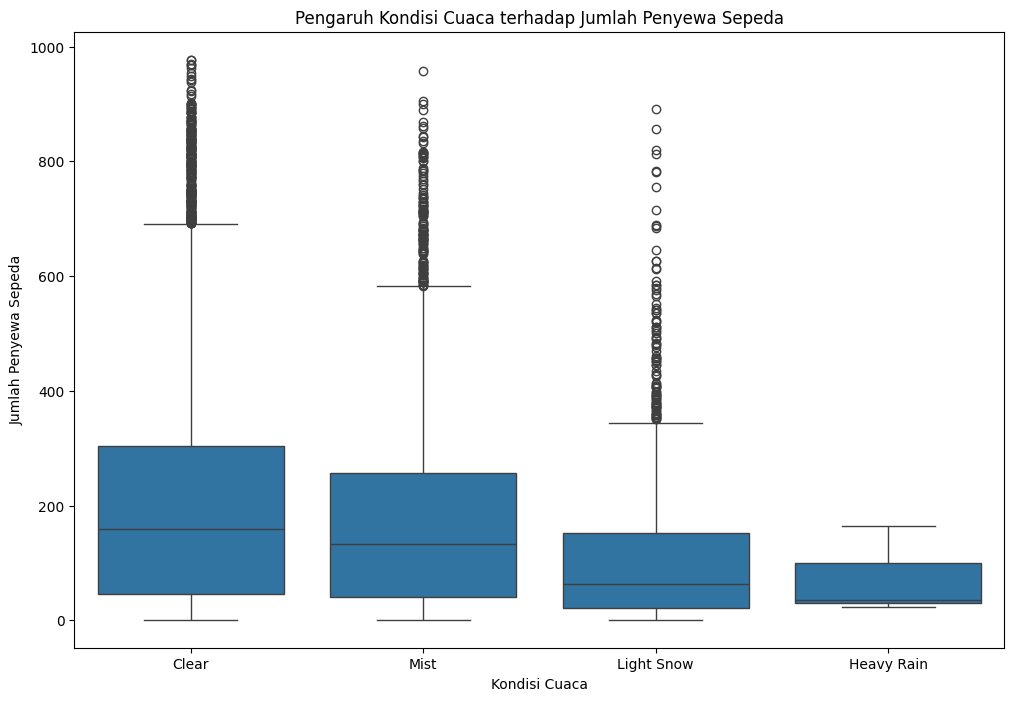

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather_situation', y='total', data=hour)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewa Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

berdasarkan box plot diatas keputusan orang untuk menyewa sepeda dipengaruhi oleh ondisi cuaca. semakin cerah kondisinya semakin banyak orang yang menyewa sepeda.

insight:
-
-

#Pertanyaan 3:
- Bagaiamana pengaruh musim terhadap jumlah penyewa sepeda


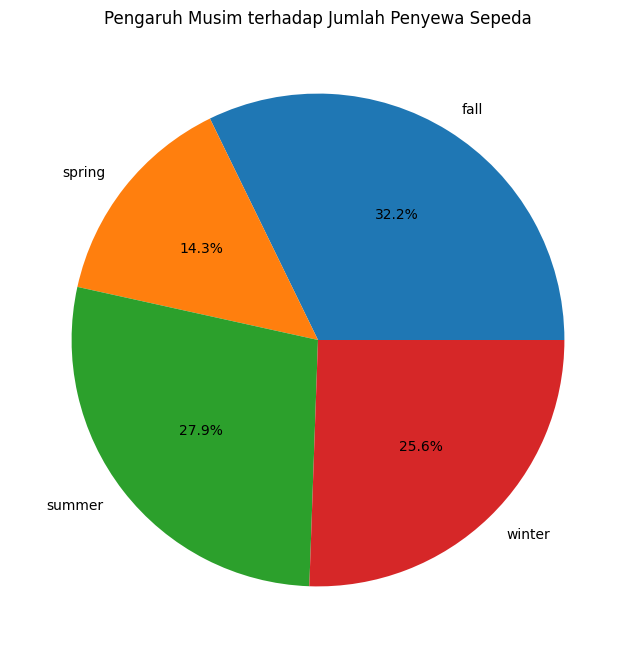

In [52]:


plt.figure(figsize=(11, 8))
hour.groupby('season')['total'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Pengaruh Musim terhadap Jumlah Penyewa Sepeda')
plt.xlabel('')
plt.ylabel('')
plt.show()


pengaruh musim juga berpengaruh terhadap keputusan untuk menyewa sepeda. musim semi berkontribuis besar terhadap presentase penyewaan sebesar 32.2 %, disusul oleh musim dingin sebesar 25.6%.

#Pertanyaan 4:
- Apakah terdapat perbedaan jumlah penyewa sepeda terdaftar dan tidak terdaftar pada hari tertentu?

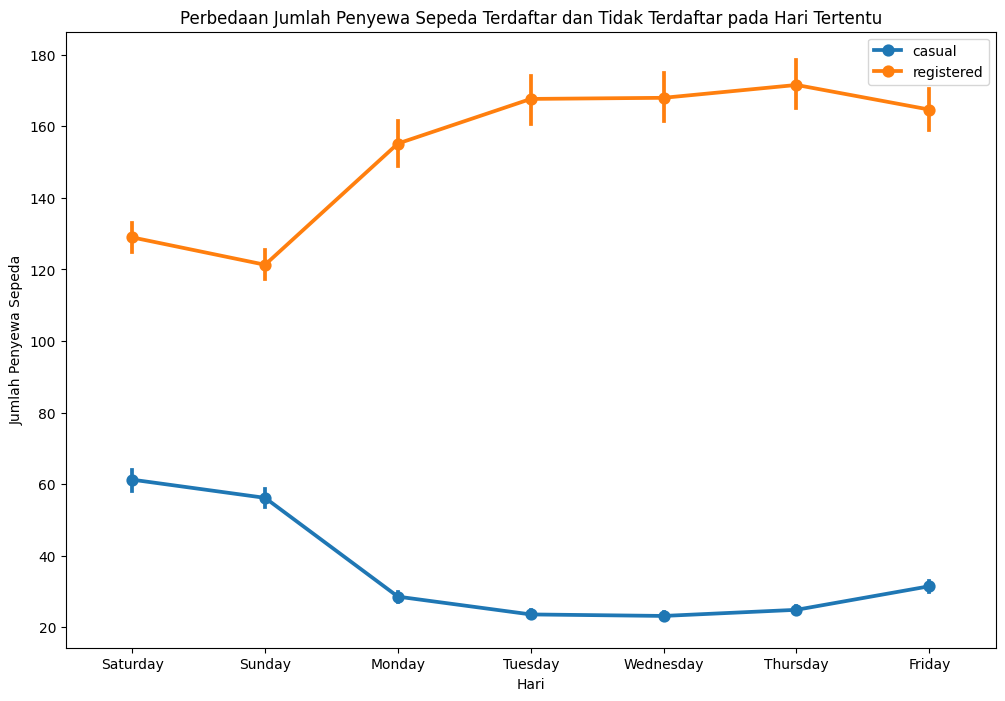

In [53]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='weekday', y='casual', label="casual", data=hour)
sns.pointplot(x='weekday', y='registered', label="registered", data=hour)
plt.title('Perbedaan Jumlah Penyewa Sepeda Terdaftar dan Tidak Terdaftar pada Hari Tertentu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.legend(title='')
plt.show()

berdasarkan gambar diatas, secara keseluruhan penyewa yang terdatar lebih banyak di semua hari.

#Conclusion
- conlusion pertanyaan 1 : kebanyakan orang menyewa sepeda di har jumat pada jam 17.00
- conclusion pertanyaan 2 : kondisi cerah mempengaruhi orang untuk menyewa sepeda paling banyak
- conclusion pertanyaan 3 : musim gugur berpengaruh besar terhadap jumlah sepeda yang disewa
- conlusion pertanyaan 4 : orang yang terdaftar lebih banyak dari pada yang tidak terdaftar




#Analisa Lanjutan


RFM_Score
111    1360
122    1494
133     945
144     523
211    1106
222    1163
233    1229
244     849
311    1003
322     946
333    1106
344    1303
411     908
422     728
433    1065
444    1651
dtype: int64
RFM_Score
111     15.066176
122     85.265730
133    198.148148
144    391.309751
211     15.172694
222     94.286328
233    201.017901
244    391.199058
311     14.932203
322     90.483087
333    210.783906
344    466.009977
411     16.111233
422     87.913462
433    212.252582
444    485.579043
Name: total, dtype: float64


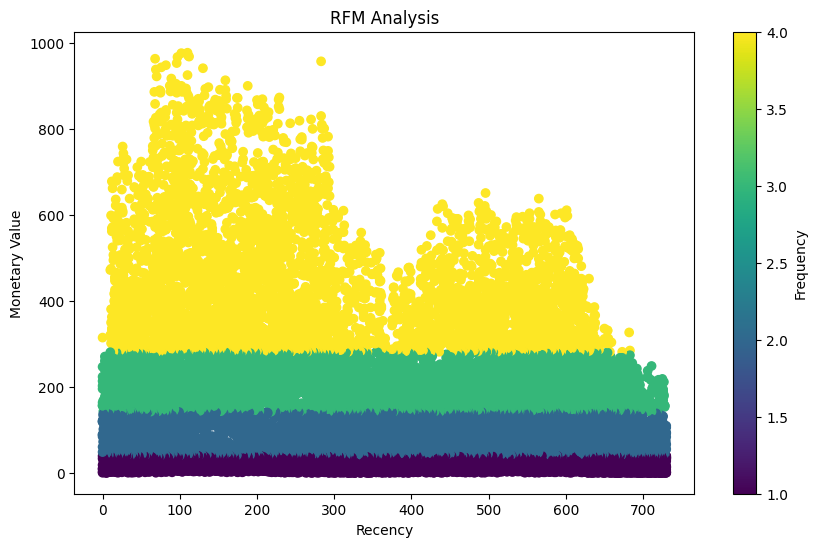

In [54]:
hour["total_customers"] = hour["casual"] + hour["registered"]
latest_date = hour["dteday"].max()
hour["recency"] = (latest_date - hour["dteday"]).dt.days
hour["monetary_value"] = hour["total"]

r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(hour['recency'], q=4, labels=r_labels)
f_groups = pd.qcut(hour['total_customers'], q=4, labels=f_labels)
m_groups = pd.qcut(hour['monetary_value'], q=4, labels=m_labels)

hour = hour.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)
hour['RFM_Score'] = hour['R'].astype(str) + hour['F'].astype(str) + hour['M'].astype(str)

high_value_customers = hour[hour['RFM_Score'].str.startswith(('4', '3'))]
print(hour.groupby('RFM_Score').size())
print(hour.groupby('RFM_Score')['total'].mean())

plt.figure(figsize=(10, 6))
plt.scatter(hour['recency'], hour['monetary_value'], c=hour['F'].astype(int), cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.title('RFM Analysis')
plt.colorbar(label='Frequency')
plt.show()

